<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:65%" align="right">


# Lista 3 - Embeddings 
**Nome:** Wesley Seidel Carvalho

**Numero Usp:** 6544342









______________




O objetivo desta lista é fazer com que vocês treinem um modelo de análise de sentimentos utilizando um embedding. O modelo final será criado na seção "montando o modelo", mas até lá vamos passar pelas seguintes etapas:  
 - Importando os dados como um dataframe
 - Pré Processamento
 - Separando em teste e treino
 - Tokenizando

 
Após montar e treinar seu modelo você tambem poderá fazer uma questão extra para ganhar nota extra nessa lista, deixar de fazer esse exercicio não prejudicará sua nota.



In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [2]:
tf.__version__

'2.3.0'

### Importando os dados como um dataframe

Para esta lista nós utilizaremos o dataset **B2W-Reviews01** que consiste em avaliações de mais de 130k compras online no site Americanas.com e [esta disponivel no github](https://github.com/b2wdigital/b2w-reviews01) sob a licensa CC BY-NC-SA 4.01.

In [3]:
b2wCorpus = pd.read_csv("data/b2w-10k.csv")
b2wCorpus.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958,F,RJ,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996,M,SC,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984,M,SP,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985,F,SP,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994,M,MG,NaN,NaN,NaN,NaN,NaN


In [4]:
b2wCorpus["review_text"]

0       Estou contente com a compra entrega rápida o ú...
1       Por apenas R$1994.20,eu consegui comprar esse ...
2       SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3       MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4       A entrega foi no prazo, as americanas estão de...
                              ...                        
9994    Celular muito rápido, com processador e armaze...
9995    achei o produto muito frágil, o material veio ...
9996    Uma porcaria pois ñ recebi ñ recomendo pra nin...
9997    Maquina excelente,super pratica. recomendo.ent...
9998    Agradeço pelo compromisso, obrigado. ,...........
Name: review_text, Length: 9999, dtype: object


### Pré-processamento
Seria util nos livrarmos das colunas que não são relevantes para o nosso problema e tambem verificar se não tem nada de esquisito nas colunas que vamos utilizar. 
Por exemplo, se fossemos utilizar a coluna "reviewer_gender" nós precisariamos nos livrar desses valores esquisitos:

In [5]:
b2wCorpus["reviewer_gender"].value_counts()

M                                                                         5033
F                                                                         4624
Ocorrência: Z-Devolução Em Andamento Ao Cd de São Paulo 22/12/17 16:12       1
                                                                             1
1970                                                                         1
Name: reviewer_gender, dtype: int64

## <font color='blue'>Questão 1 </font>

a) Selecione apenas as colunas relevantes: "review_text" e "recommend_to_a_friend". 

b) Converta a coluna "recommend_to_a_friend" de uma coluna de `str` para uma coluna de `int`:

- "Yes"-> 1
- "No" -> 0


In [6]:
# Seu código aqui
df = b2wCorpus[['review_text','recommend_to_a_friend']]
df['recommend_to_a_friend'] = df['recommend_to_a_friend'].map({'Yes': 1, 'No': 0})
# df.groupby('recommend_to_a_friend').count()

/home/wseidel/envs/usp-MAC5725/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Separando em teste e treino
## <font color='blue'>Questão 2 </font>

Agora com o dataset já pré-processado, separe o em 2 partes, um conjunto de teste e um conjunto de treino. Novamente você pode utilizar a função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn como na lista passada.

In [7]:
# Seu código aqui
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review_text'], df['recommend_to_a_friend'], test_size=0.20, random_state=17)
# [X_train, y_train]

### Tokenizando

Para alimentarmos os reviews a camada de embedding nós precisamos quebrar cada review em uma serie de tokens. Existem diversas maneiras de se realizar isso e poderiamos até mesmo usar outras bibliotecas como o spaCy. 

Por exemplo, o objeto [`Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) oferece um método `tokenize` para quebrar as palavras em tokens individuais ao mesmo tempo que filtra caracteres indesejados (por default os caracteres filtrados são: !"#$\%&()*+,-./:;<=>?@[\\]^_\`{|}~\t\n).


Para essa lista utilizaremos a camada [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) para automaticamente passar os reviews para caixa-baixa, extrair caracteres especiais e tokenizar as palavras de maneira a serem passadas para a camada de embedding. Ao tornarmos a etapa de tokenização uma camada de rede neural nós podemos incluir esse processamento dos reviews no proprio modelo.


## <font color='blue'>Questão 3 </font>
Utilizando a camada `TextVectorization` tokenize os inputs.
Declare a camada e então chame a função `adapt()` para adequar o seu vocabulário aos reviews.

Não se esqueça de se certificar que todas os reviews tenham o mesmo comprimento, seja por meio do uso de padding, truncamento ou uma mistura dos dois. Plotamos um histograma do comprimento dos reviews para lhe auxiliar nessa decisão.

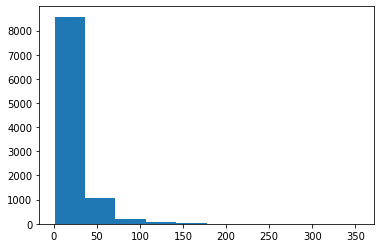

In [8]:
plt.hist([len(linha.split()) for linha in b2wCorpus["review_text"]])
plt.show()

In [9]:
max( [ len(t) for t in list(X_train) ] )

1907

In [10]:
# Seu código aqui

MAX_TOKENS = 5000

vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=MAX_TOKENS,
    ngrams=2,
    standardize= 'lower_and_strip_punctuation', # None
    output_mode='count', # "int", "binary", "count" or "tf-idf",
#     output_sequence_length=75,  # Only valid in INT mode.
    pad_to_max_tokens=True,     # Only valid in "binary", "count", and "tf-idf" modes.
)

vectorize_layer.adapt(list(X_train))
# vectorize_layer.adapt(list(X_test))

SHOW_TESTS = False
if SHOW_TESTS:
    print("   0 ---> ",vectorize_layer.get_vocabulary()[0])
    print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
    print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
    print('Tamanho do Vocab.: {}'.format(len(vectorize_layer.get_vocabulary())))
    print('O Vocabulario....: {}'.format( vectorize_layer.get_vocabulary()[0:15] ))
    
    sample_train =  X_train.iloc[107]
    vec_sample_train = vectorize_layer( sample_train )
    
    print( sample_train )
    print( y_train.iloc[107] )
    print( len(sample_train.split()) )
    print( vec_sample_train )
    print( vec_sample_train.shape )


### Montando o modelo

Agora vamos juntar a camada do tokenizador a nossa camada [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) e definir o resto de nosso modelo.

##  <font color='blue'>Questão 3 </font>

Defina seu modelo.

Como analise de sentimentos pode ser visto como um problema de classificação, é interessante também registrar algumas métricas como acurácia `metrics=["acc"]` .

Seu modelo deve começar com a seguinte estrutura:
 - Camada de Input
 - Camada de Tokenização
 - Camada de Embedding
 
Já definimos as camadas seguintes da rede por você.
 
Atenção a dimensão do input da camada de embedding, lembre se que < OOV > e < PAD > possuem seus próprios tokens.


In [11]:
model = tf.keras.Sequential([    
    ############ Seu código aqui##################
    tf.keras.Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    tf.keras.layers.Embedding(MAX_TOKENS+1, 128, input_length=75),   
    ##############################################
    # Conv1D + global max pooling
    layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3),
    layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3),
    layers.GlobalMaxPooling1D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])

# model.compile(loss=losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=tf.metrics.BinaryAccuracy(threshold=0.0))
# model.compile(loss="mean_squared_error", optimizer='adam', metrics=tf.metrics.BinaryAccuracy(threshold=0.0))
model.compile(loss="mean_squared_error", optimizer='adam', metrics=["acc"])

# model.fit(X_train[0:1000], y_train[0:1000])
model.fit(X_train, y_train,epochs=5)

model.summary()

Epoch 1/5
250/250 [==============================] - 180s 722ms/step - loss: 0.1771 - acc: 0.7615
Epoch 2/5
250/250 [==============================] - 169s 676ms/step - loss: 0.1346 - acc: 0.8124
Epoch 3/5
250/250 [==============================] - 182s 727ms/step - loss: 0.1278 - acc: 0.8232
Epoch 4/5
250/250 [==============================] - 185s 739ms/step - loss: 0.1221 - acc: 0.8320
Epoch 5/5
250/250 [==============================] - 194s 777ms/step - loss: 0.1198 - acc: 0.8384
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 5000)              0         
_________________________________________________________________
embedding (Embedding)        (None, 5000, 128)         640128    
_________________________________________________________________
conv1d (Conv1D)              (None, 1665, 128)         114816    
____________________________

### Treinando e avaliando seu modelo

##  <font color='blue'>Questão 4 </font>

Com seu modelo definido, treine e avalie sua performance no conjunto de testes.



In [12]:
# Seu código aqui
loss, accuracy = model.evaluate(x=X_test,y=y_test)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

63/63 [==============================] - 13s 203ms/step - loss: 0.1290 - acc: 0.8215
Loss:  0.12901121377944946
Accuracy:  0.8215000033378601


##  <font color='green'>Questão Extra </font>
Valendo pontos extras, você não vai ser prejudicado se deixar de faze-la

### Vizualizando o embedding
Agora que temos um embedding treinado em nossa tarefa de analise de sentimentos, podemos tentar vizualisar este embedding. O [embedding projector](https://projector.tensorflow.org/) nos permite visualiza-los de maneira mais intuitiva.

Para carregar seu próprio embedding você precisará fornecer 2 arquivos, um com os embeddings propriamente ditos e outro com os métadados (no nosso caso, um string que representa a palavra). 

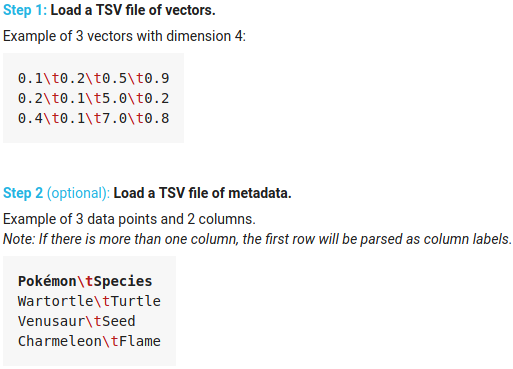

Esse [guia](https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin) pode ser util para entender melhor como extrair essas informações.

In [20]:
# Seu código aqui
# Com AINDA não consegui fazer o projector funcionar localmente, resolvi fazer salvar os dois arquivos.

# A) Salvando o embeddings no formato para carga do Projector
# O meu embeddind está na segunda camada do modelo, sendo assim, obtenho os pesos segundo o tutorial indicado.
weights = tf.Variable(model.layers[1].get_weights()[0][1:])
with open('embeddings.tsv', "w") as f:
    for vec in weights[:]:
        for pos in vec:
            f.write("{}\t".format(float(pos)))
        f.write("\n")

# B) Salvando os metadados no no formato para carga do Projector
# Os meus metadados são as palavras do vocabulário criado na camada de vetorização dos dados de treinamento.
with open('metadata.tsv', "w") as f:
    for subwords in vectorize_layer.get_vocabulary():
        f.write("{}\n".format(subwords))

In [19]:
weights = model.layers[1].get_weights()[0][1:]
len(weights[:])

5000

Procure por palavras com conotações tradicionalmente positivas e negativas, elas estão proximas ou distantes?
Usando a visualização PCA, você consegue notar alguma característica interessante sobre como as palavras estão distribuidas nesse espaço?


**<font color='red'> Sua resposta aqui </font>**

### Comentários
Particularmente não consegui perceber clusters sobre positivos/negativos. Mesmo porque para a criação do embedding não é necessário informar as classes/target do problema que estamos analisando.

#### Sobre algumas palavras bem distantes das demais
Uma coisa me chamou atenção. Algumas palavras estava bem distantes de quase todas as outras e mais ou menos no mesmo espaço. Ao analisar um pouco, percebe-se que são palavras que provavelmente poderiam ser eliminadas do treinamento, tais como stopwords. Bem, mas não sei exatamente o que dizer da palavra "não" no meio destas. :)

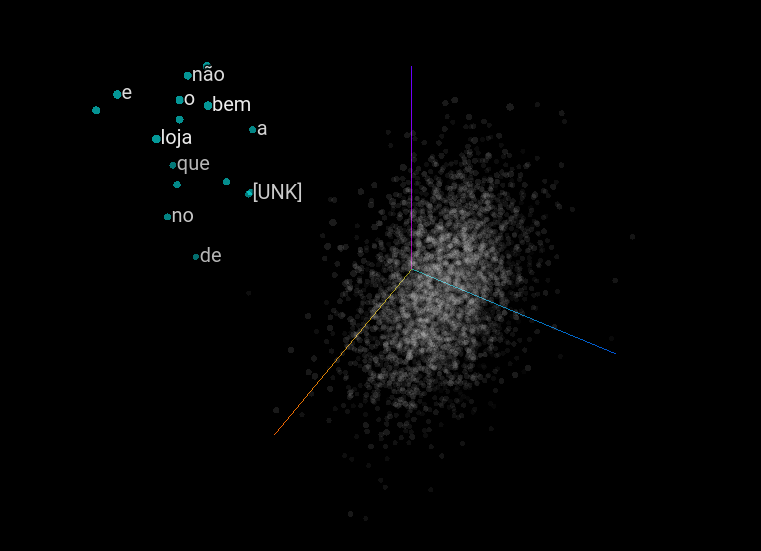


#### Sobre a palavra "ótimo"
Além disso, também estranhei a distância da palavra "ótimo" e algumas variações. Mais estranho ainda: o normalizador 'lower_and_strip_punctuation' não deveria ter transformado o "Ó" em "ó" em uma das palavras da figura? 

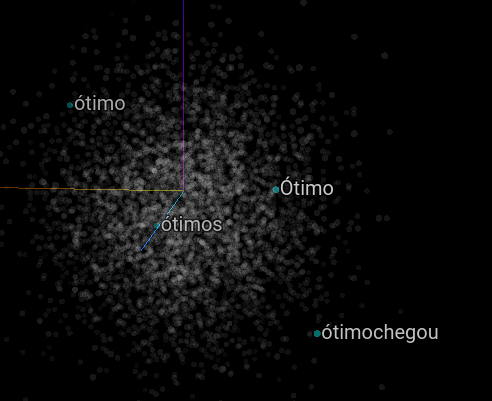